## 나스닥 가격 크롤링

### 휴장으로 인한 missing values(dates, prices) 가 있는 데이터 

In [49]:
import requests 
from bs4 import BeautifulSoup 
import datetime
import time

URL_TEMPLATE = 'https://finance.yahoo.com/quote/%5EIXIC/history?period1={}&period2={}&interval=1d&filter=history&frequency=1d&includeAdjustedClose=tru'

headers = {'User-Agent': 'Mozilla/5.0'}
interval = datetime.timedelta(days=100)
start_date = datetime.datetime(2018, 2, 22)
end_date = datetime.datetime(2023, 2, 21)

ranges = []
while start_date <= end_date:
    range_start = int(start_date.timestamp())
    range_end = int((start_date + interval).timestamp())
    ranges.append((range_start, range_end))
    start_date += interval

nasdaq_list = []

for period1, period2 in ranges:
    url = URL_TEMPLATE.format(period1, period2)
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser') 
    results = soup.select('tbody tr')

    for result in results:
        date = result.select_one('td:nth-child(1)').text
        price = result.select_one('td:nth-child(5)').text

        nasdaq_list.append({
            'date': date,
            'price': price
        })

    time.sleep(10)

nasdaq_list_sorted = sorted(nasdaq_list, key=lambda x: datetime.datetime.strptime(x['date'], '%b %d, %Y')) # missing dates가 있는 데이터 

### missing values 를 전날 가격으로 대체한 데이터

In [50]:
nasdaq_list_modified = []

last_nasdaq_price = None

for bitcoin in bitcoin_list_modified:
    date = bitcoin['date']
    
    for nasdaq in nasdaq_list_sorted:
        if nasdaq['date'] == date:
            last_nasdaq_price = nasdaq['price']
            break
    
    if last_nasdaq_price is None:
        # If no matching date found, use last available price
        nasdaq_list_modified.append({
            'date': date,
            'price': last_nasdaq_price
        })
    else:
        nasdaq_list_modified.append({
            'date': date,
            'price': last_nasdaq_price
        })

nasdaq_list_modified_sorted = nasdaq_list_modified[0:1836] 


In [52]:
import json

# 파일에 저장할 데이터
data = {'nasdaq_list': nasdaq_list_modified_sorted}

# 파일에 데이터를 쓰기
with open('nasdaq_data.json', 'w') as f:
    json.dump(data, f)

In [53]:
import json

# 파일에서 데이터를 읽어오기
with open('nasdaq_data.json', 'r') as f:
    data = json.load(f)

# 데이터 사용하기
nasdaq_list_modified_sorted = data['nasdaq_list']

In [54]:
nasdaq_prices_sorted = [item['price'] for item in nasdaq_list_modified_sorted]

In [26]:
nasdaq_dates_sorted = [item['date'] for item in nasdaq_list_modified_sorted]

## 비트코인 가격 크롤링

In [9]:
import requests 
from bs4 import BeautifulSoup 
import datetime
import time

URL_TEMPLATE = 'https://finance.yahoo.com/quote/BTC-USD/history?period1={}&period2={}&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true'

headers = {'User-Agent': 'Mozilla/5.0'}
interval = datetime.timedelta(days=100)
start_date = datetime.datetime(2018, 2, 21)
end_date = datetime.datetime(2023, 2, 21)

ranges = []
while start_date <= end_date:
    range_start = int(start_date.timestamp())
    range_end = int((start_date + interval).timestamp())
    ranges.append((range_start, range_end))
    start_date += interval

bitcoin_list = []

for period1, period2 in ranges:
    url = URL_TEMPLATE.format(period1, period2)
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.text, 'html.parser') 
    results = soup.select('tbody tr')

    for result in results:
        date = result.select_one('td:nth-child(1)').text
        price = result.select_one('td:nth-child(5)').text

        bitcoin_list.append({
            'date': date,
            'price': price
        })

    time.sleep(10)

bitcoin_list_sorted = sorted(bitcoin_list, key=lambda x: datetime.datetime.strptime(x['date'], '%b %d, %Y'))

In [10]:
bitcoin_list_modified = []

for data in bitcoin_list_sorted:
    bitcoin_list_modified.append({
        'date': data['date'],
        'price': ''
    })

In [11]:
import json

# 파일에 저장할 데이터
data = {'bitcoin_list': bitcoin_list_sorted}

# 파일에 데이터를 쓰기
with open('bitcoin_data.json', 'w') as f:
    json.dump(data, f)

In [12]:
import json

# 파일에서 데이터를 읽어오기
with open('bitcoin_data.json', 'r') as f:
    data = json.load(f)

# 데이터 사용하기
bitcoin_list_sorted = data['bitcoin_list']

In [13]:
bitcoin_dates_sorted = [item['date'] for item in bitcoin_list_sorted]

In [14]:
bitcoin_prices_sorted = [item['price'] for item in bitcoin_list_sorted]

## 한번에 두개 그래프 그리기 
### x 축은 날짜, y1은 비트코인 가격, y2은 나스닥 가격

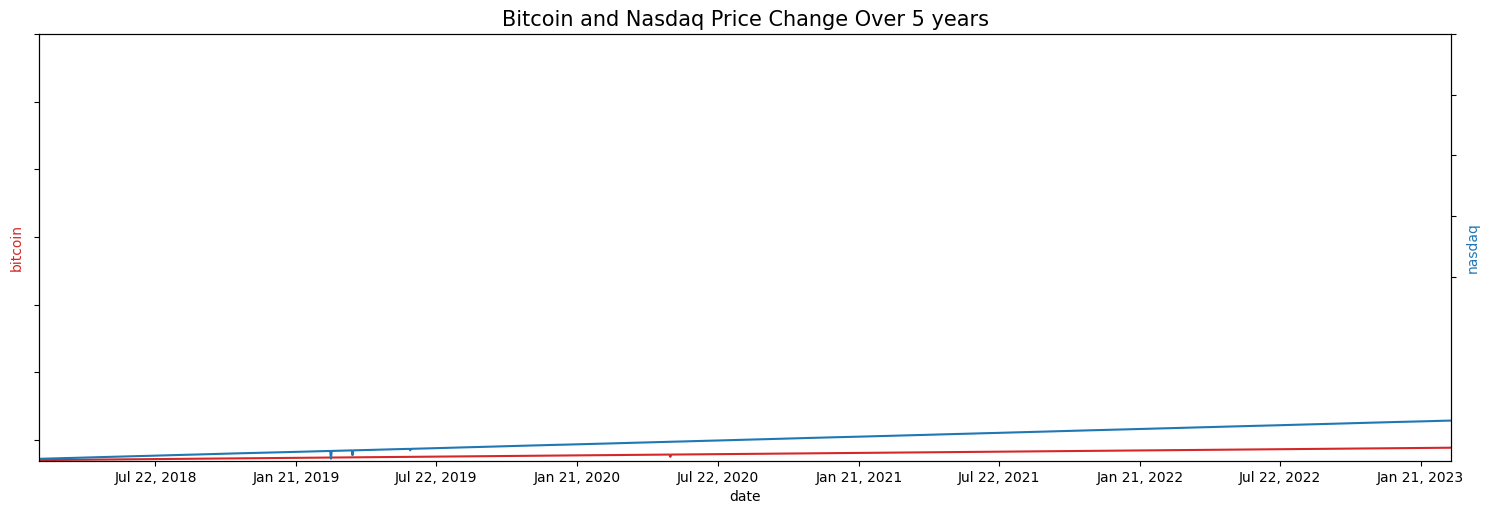

In [75]:
import numpy as np 
import matplotlib.pyplot as plt
import datetime as dt 
import matplotlib.dates as mdates

# 그래프 데이터
x = bitcoin_dates_sorted
y1 = bitcoin_prices_sorted
y2 = nasdaq_prices_sorted

fig, ax1 = plt.subplots(figsize=(15,5)) 

color = 'tab:red'
ax1.set_xlabel('date', fontsize = 10)
ax1.set_ylabel('bitcoin', fontsize = 10, color=color)
ax1.plot(x, y1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.yaxis.set_ticks(np.arange(3000, 65000, 10000))

ax2 = ax1.twinx() 

color = 'tab:blue'
ax2.set_ylabel('nasdaq', fontsize = 10, color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.yaxis.set_ticks(np.arange(6000, 16000, 2000))

fig.tight_layout()  # otherwise the right y-label is slightly clipped


# x축 범위 설정하기
ax1.set_xlim(bitcoin_dates_sorted[0], bitcoin_dates_sorted[-1])
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=6))

plt.title('Bitcoin and Nasdaq Price Change Over 5 years', fontsize=15) 
plt.show()